In [1]:
# Ensure plots are displayed inline
%matplotlib inline
#%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

# make PDF renders nicer
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

import numpy as np
from scipy.fftpack import fft
from scipy.signal import get_window
import math

In [3]:
M = 63
window = get_window('hanning', M)
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))

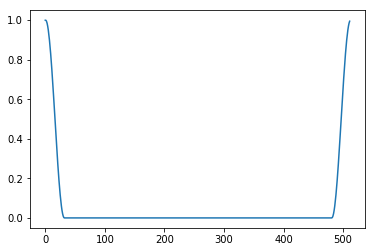

In [4]:
N = 512
hN = int(N / 2)
fftbuffer = np.zeros(N)
fftbuffer[:hM1] = window[hM2:]
fftbuffer[N-hM2:] = window[:hM2]
plt.figure()
plt.plot(fftbuffer);

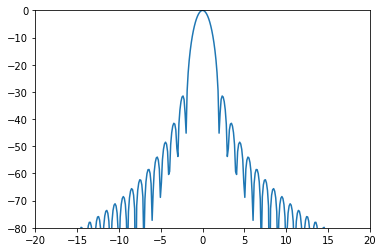

In [5]:
X = fft(fftbuffer)
absX = abs(X)
absX[absX < np.finfo(float).eps] = np.finfo(float).eps  # avoid log(0)
mX = 20*np.log10(absX)
pX = np.angle(X)

mX1 = np.zeros(N)
pX1 = np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN:] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN:] = pX[:hN]

plt.figure()
plt.plot(np.arange(-hN, hN) / float(N) * M, mX1 - max(mX1))
plt.axis([-20, 20, -80, 0]);